In [29]:
import pandas as pd 
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [31]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [32]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'type'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

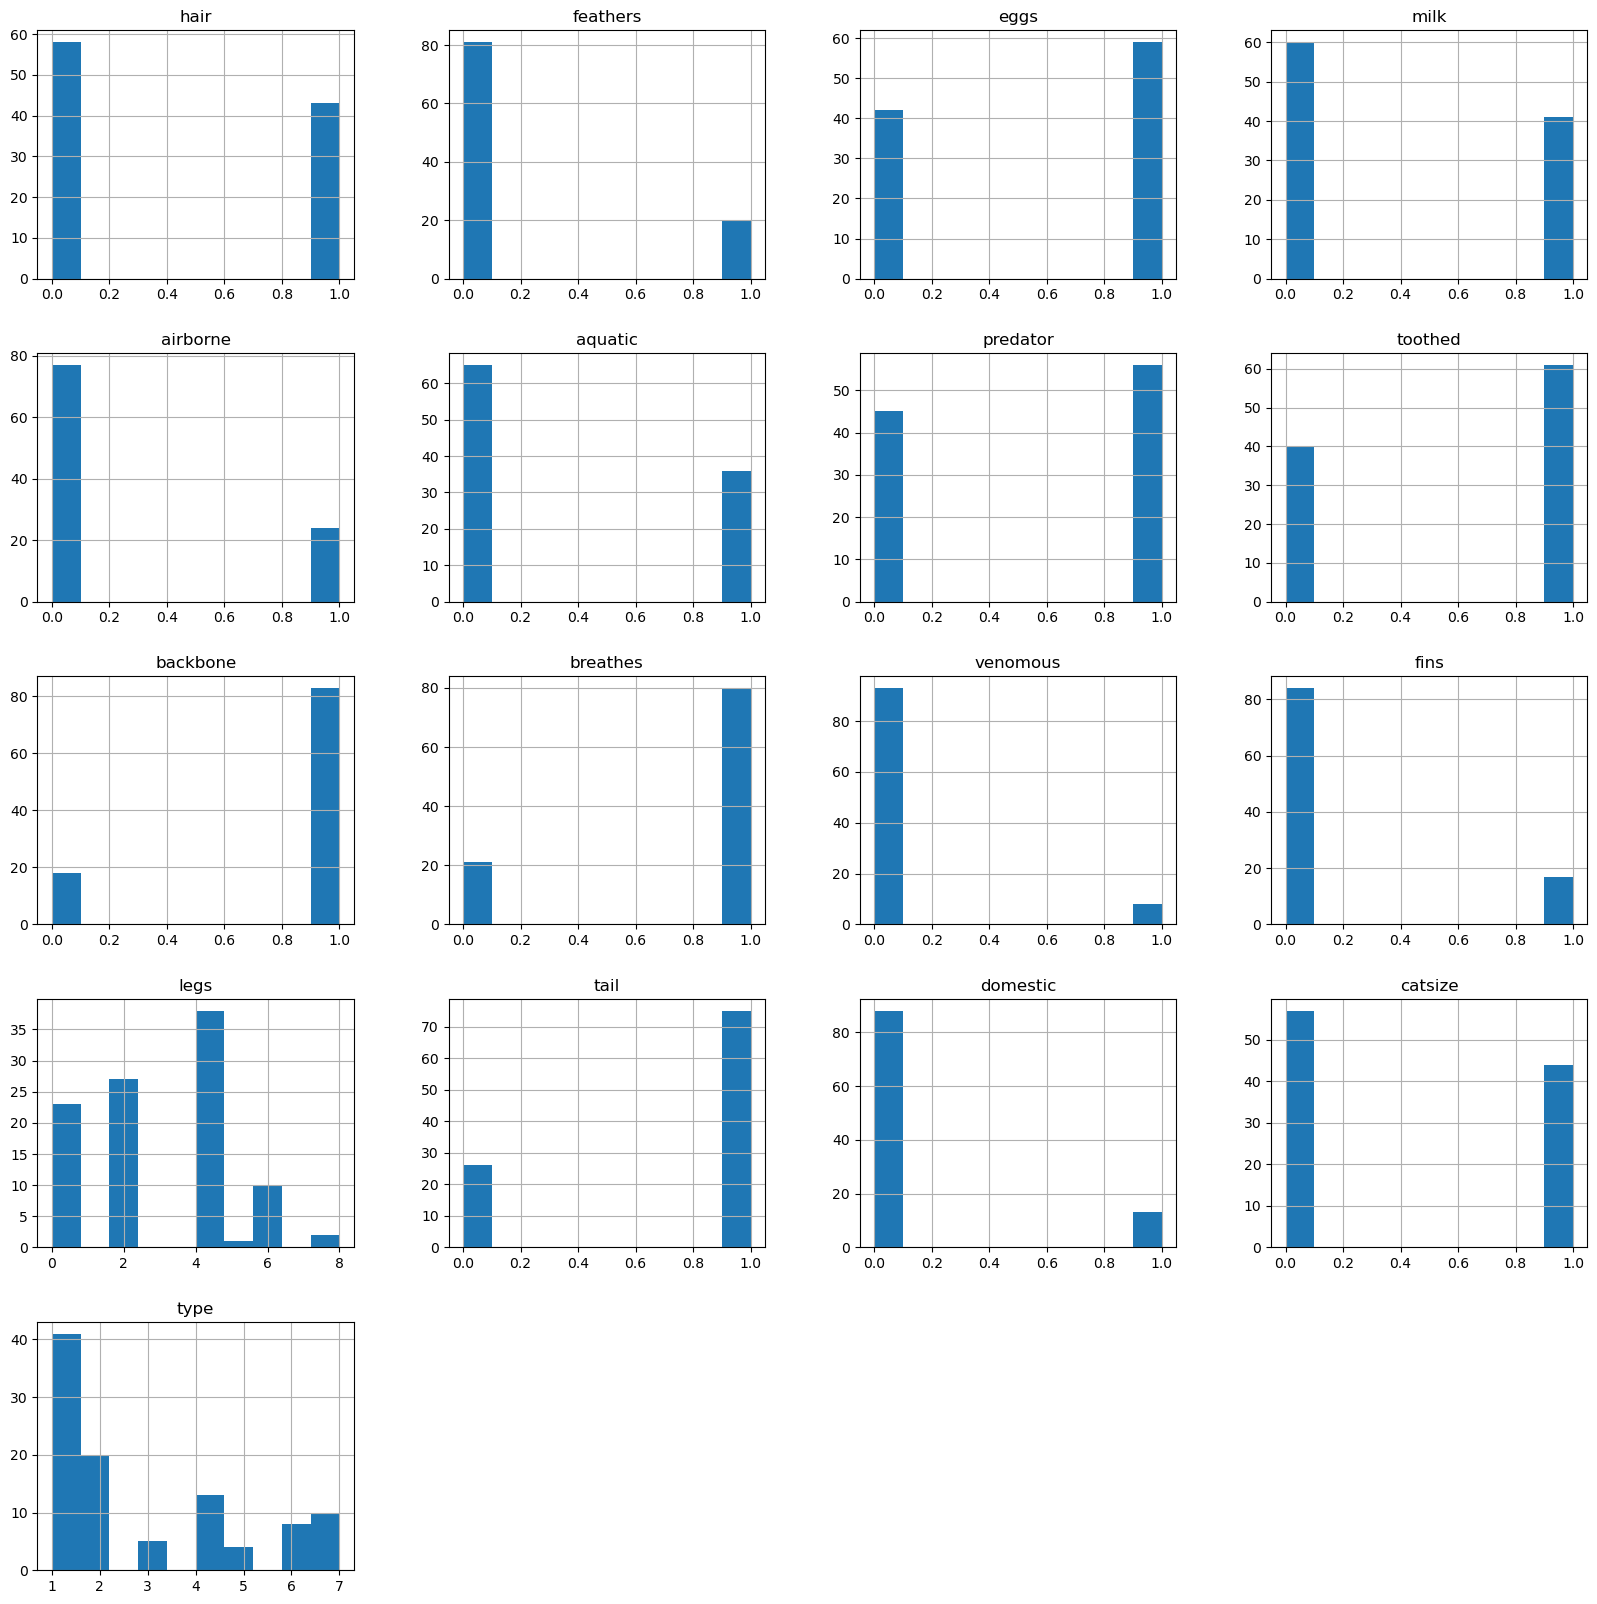

In [34]:
df.hist(figsize=(20,20))

In [35]:
df1 = df.drop('animal name',axis = 1)

In [36]:
df1.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [37]:
df1.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

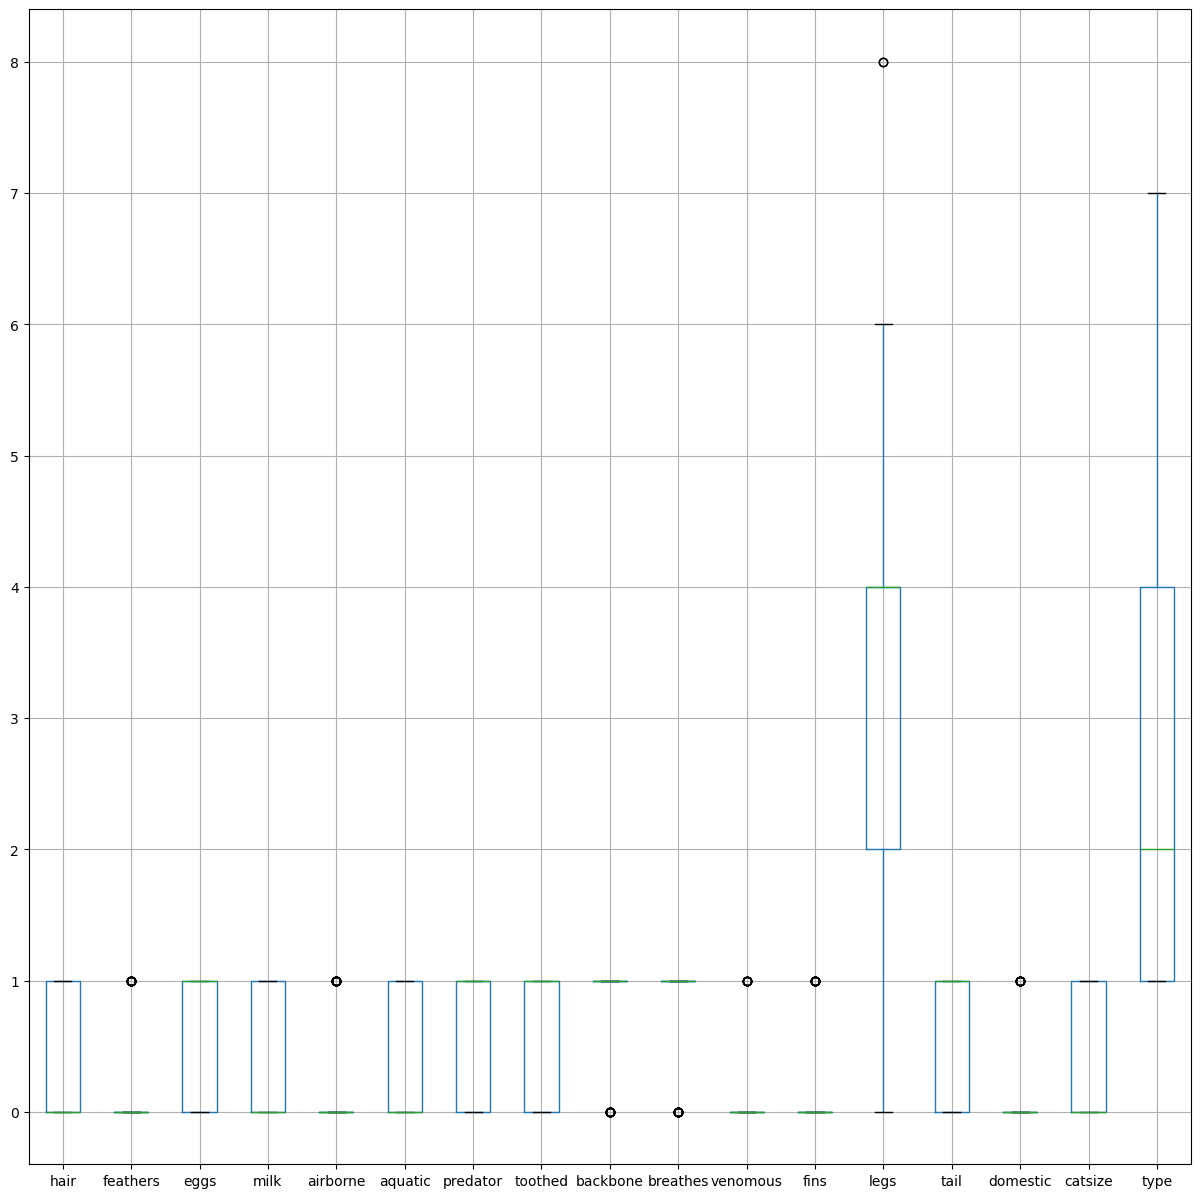

In [38]:
df1.boxplot(figsize = (15,15))

# Preprocessing:

In [39]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [40]:
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df.select_dtypes(include = [np.number]))) < 3).all(axis =1)]

In [41]:
df1.shape

(93, 17)

# Data Partition:

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score

In [43]:
x = df1.drop(['type'],axis =1)
y = df1['type']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state =42)

In [45]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((74, 16), (19, 16), (74,), (19,))

# Model Fitting:

In [46]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average = 'weighted')
recall = recall_score(y_test,y_pred , average = 'weighted')
f1 = f1_score(y_test,y_pred,average = 'weighted')

print("Accuracy score:",accuracy)
print("Precision score:",precision)
print("Recall:",recall)
print("F1 score:",f1)

Accuracy score: 0.8947368421052632
Precision score: 0.8118022328548644
Recall: 0.8947368421052632
F1 score: 0.8486215538847117


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyper Parameter Tuning:

In [49]:
num_folds = 10# KFold techniques
KFold = KFold(n_splits = 10)

In [50]:
model1 = KNeighborsClassifier(n_neighbors =3)
results = cross_val_score(model,x,y,cv = KFold)

In [51]:
print(results.mean())

0.8488888888888889


In [53]:
#using GridSearchCV for parameter tuning and optimization
from sklearn.model_selection import GridSearchCV
KNN= KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric':['euclidean','manhattan']}
grid_search =GridSearchCV(estimator=KNN,param_grid=param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [54]:
print("Best parameters found:",grid_search.best_params_)
print("Best cross-validation score:",grid_search.best_score_)

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9733333333333334


In [58]:
#NEW MODEL WITH BETTER PARAMETERS
best_knn = KNeighborsClassifier(n_neighbors = 3,weights = 'distance',metric = 'manhattan')
best_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [59]:
y_pred_new = best_knn.predict(x_test)

In [62]:
#time for evaluation
accuracy = accuracy_score(y_test,y_pred_new)
precision = precision_score(y_test,y_pred_new,average = 'weighted')
recall = recall_score(y_test,y_pred_new,average = 'weighted')
f1 = f1_score(y_test,y_pred_new,average='weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.9473684210526315
Precision: 0.9078947368421053
Recall: 0.9473684210526315
F1 Score: 0.9248120300751879


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyper parameter tuning to choose an appropriate distance metric and value for K:

In [64]:
from sklearn.model_selection import KFold
num_folds = 10
KFold = KFold(n_splits = 10)
model1 = KNeighborsClassifier(n_neighbors =3)
results = cross_val_score(model,x,y,cv =KFold)
print(results.mean())

0.8488888888888889


In [66]:
KNN= KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric':['euclidean','manhattan']}
grid_search =GridSearchCV(estimator=KNN,param_grid=param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [67]:
print("Best parameters found:",grid_search.best_params_)
print("Best cross-validation score:",grid_search.best_score_)

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9733333333333334


In [70]:
best_knn = KNeighborsClassifier(n_neighbors = 3,weights ='distance',metric = 'manhattan')
best_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

# Classifier's preformance on testing set:

In [71]:
y_pred_new = best_knn.predict(x_test)

accuracy = accuracy_score(y_test,y_pred_new)
precision = precision_score(y_test,y_pred_new,average = 'weighted')
recall = recall_score(y_test,y_pred_new,average = 'weighted')
f1 = f1_score(y_test,y_pred_new,average = 'weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)
print("F1 score:",f1)

Accuracy: 0.9473684210526315
Precision: 0.9078947368421053
F1 score: 0.9248120300751879


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualizatoin of decision boundaries of the classifier:

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


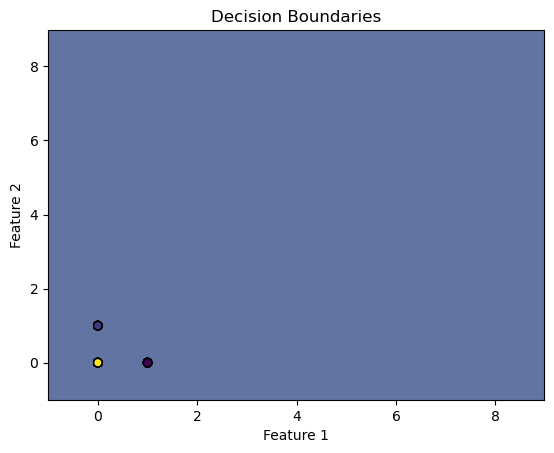

In [75]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
h = .02
x_min , x_max = x_train.min().min() - 1,x_train.max().max()+1
y_min , y_max = x_train.min().min() - 1,x_train.max().max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))
grid_df = pd.DataFrame(np.c_[xx.ravel(),yy.ravel()])
for i in range(2,x_train.shape[1]):
    grid_df[i]=0
    
best_knn = grid_search.best_estimator_
Z = best_knn.predict(grid_df)
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha =0.8)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,edgecolor = 'k',marker ='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()

# Interview Questions: